Choose the routing method:
1. OSMnx
2. OSRM
Enter your choice (1 or 2): 1
Enter the first location name: Ankara
Enter the second location name: Gaziantep
Graph saved as 'osmnx_shortest_path.png'.


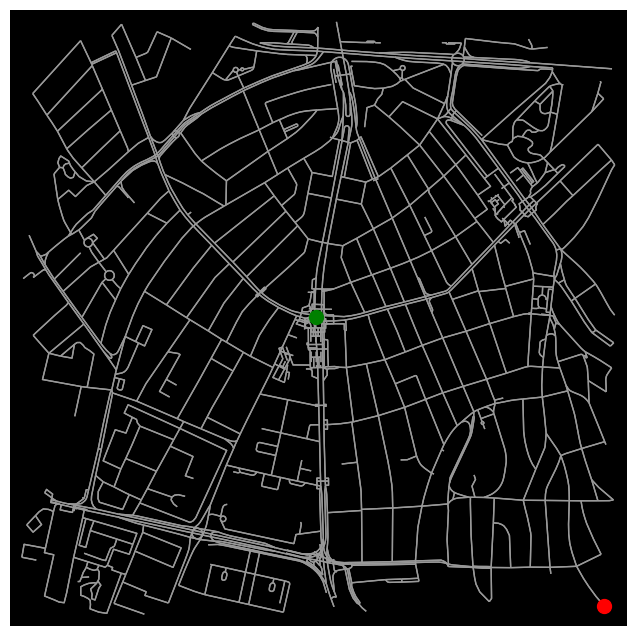

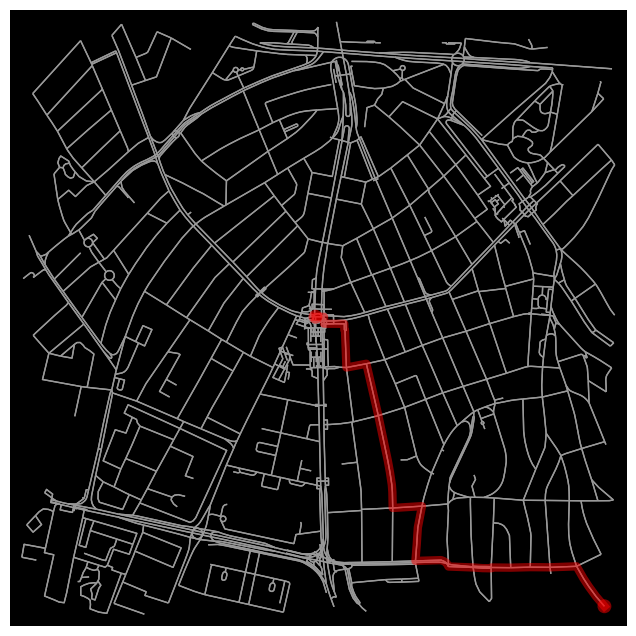

In [22]:
import osmnx as ox
import requests
import polyline
import networkx as nx
import matplotlib.pyplot as plt

def get_osmnx_shortest_path(loc1_name, loc2_name):
    location1 = ox.geocode(loc1_name + ", Turkey")
    location2 = ox.geocode(loc2_name + ", Turkey")

    # OSMnx graph with 'walk' network type
    graph = ox.graph_from_point(location1, network_type='walk')
    origin_node = ox.distance.nearest_nodes(graph, location1[1], location1[0])
    target_node = ox.distance.nearest_nodes(graph, location2[1], location2[0])
    route = nx.shortest_path(graph, origin_node, target_node)

    return graph, route

def plot_osmnx_shortest_path(graph, route, save_path=None):
    # Plot graph
    fig, ax = ox.plot_graph(graph, node_size=0, bgcolor='k', show=False)

    # Plot route on the graph
    route_nodes = ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k', show=False, close=False)
    
    ax.scatter(graph.nodes[route[0]]['x'], graph.nodes[route[0]]['y'], c='g', marker='o', s=100, label='Start')
    ax.scatter(graph.nodes[route[-1]]['x'], graph.nodes[route[-1]]['y'], c='r', marker='o', s=100, label='End')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.legend()
        plt.show()

def get_osrm_route(start, end):
    url = f"https://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if 'routes' in data and len(data['routes']) > 0:
            return data['routes'][0]['geometry']
    else:
        print("Error:", response.status_code)
        return None

def visualize_route(route_geometry):
    decoded_route = decode_polyline(route_geometry)
    lats, lons = zip(*decoded_route)
    
    plt.plot(lons, lats, marker='o', color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('OSRM Route Visualization')
    plt.show()

def decode_polyline(polyline_str):
    coords = polyline.decode(polyline_str)
    return list(zip(*[iter(coords)] * 2))

def get_coordinates_from_user(prompt):
    while True:
        try:
            longitude = float(input(f"Enter {prompt} longitude: "))
            latitude = float(input(f"Enter {prompt} latitude: "))
            return [longitude, latitude]
        except ValueError:
            print("Invalid input. Please enter valid coordinates.")

def main():
    print("Choose the routing method:")
    print("1. OSMnx")
    print("2. OSRM")

    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        location1_name = input("Enter the first location name: ")
        location2_name = input("Enter the second location name: ")
        
        graph, shortest_path = get_osmnx_shortest_path(location1_name, location2_name)

        if shortest_path:
            plot_osmnx_shortest_path(graph, shortest_path, save_path='osmnx_shortest_path.png')
            print("Graph saved as 'osmnx_shortest_path.png'.")
        else:
            print("Shortest path not found for one or both locations!")

    elif choice == '2':
        print("Enter the coordinates for the start point:")
        start_point = get_coordinates_from_user("start")
        
        print("\nEnter the coordinates for the end point:")
        end_point = get_coordinates_from_user("end")
        
        route_geometry = get_osrm_route(start_point, end_point)
        if route_geometry:
            print("\nRoute geometry:", route_geometry)
            visualize_route(route_geometry)
        else:
            print("Route not found!")

    else:
        print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()

Choose the routing method:
1. OSMnx
2. OSRM
Enter your choice (1 or 2): 2
Enter the coordinates for the start point:
Enter start longitude: 39.925533
Enter start latitude: 32.866287

Enter the coordinates for the end point:
Enter end longitude: 37.066666
Enter end latitude: 37.383331

Route geometry: e~trFodrgE|kAziIxcS~uAdfCreJxlZcWtn]krf@~`PqlBne[{qY`~Ko_Rxq@euX`iMuiVhs@chg@zv\uby@r~t@uxv@jwe@efVlv\m|k@hx[i`Vpob@a`E~wa@tgSn`XzwB``FmrThpPagErjSsvVv_IcO~oVx{QdwMokCbuCwwJ|jH`xCvcI_bSjoNuiCgeEiod@ljJoblCy{XwelAiyO__U`dFeix@oaFuaH|jBquL_gSik_AblHmlYtzNewB`rPskR


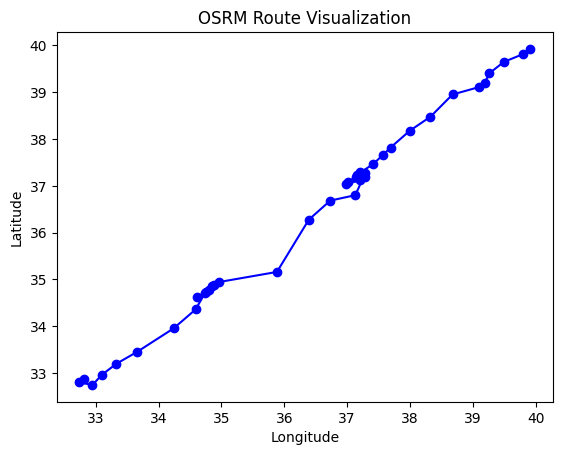

In [23]:
import osmnx as ox
import requests
import polyline
import networkx as nx
import matplotlib.pyplot as plt

def get_osmnx_shortest_path(loc1_name, loc2_name):
    location1 = ox.geocode(loc1_name + ", Turkey")
    location2 = ox.geocode(loc2_name + ", Turkey")

    # OSMnx graph with 'walk' network type
    graph = ox.graph_from_point(location1, network_type='walk')
    origin_node = ox.distance.nearest_nodes(graph, location1[1], location1[0])
    target_node = ox.distance.nearest_nodes(graph, location2[1], location2[0])
    route = nx.shortest_path(graph, origin_node, target_node)

    return graph, route

def plot_osmnx_shortest_path(graph, route, save_path=None):
    # Plot graph
    fig, ax = ox.plot_graph(graph, node_size=0, bgcolor='k', show=False)

    # Plot route on the graph
    route_nodes = ox.plot_graph_route(graph, route, route_linewidth=6, node_size=0, bgcolor='k', show=False, close=False)
    
    ax.scatter(graph.nodes[route[0]]['x'], graph.nodes[route[0]]['y'], c='g', marker='o', s=100, label='Start')
    ax.scatter(graph.nodes[route[-1]]['x'], graph.nodes[route[-1]]['y'], c='r', marker='o', s=100, label='End')

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.legend()
        plt.show()

def get_osrm_route(start, end):
    url = f"https://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if 'routes' in data and len(data['routes']) > 0:
            return data['routes'][0]['geometry']
    else:
        print("Error:", response.status_code)
        return None

def visualize_route(route_geometry):
    decoded_route = decode_polyline(route_geometry)
    lats, lons = zip(*decoded_route)
    
    plt.plot(lons, lats, marker='o', color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('OSRM Route Visualization')
    plt.show()

def decode_polyline(polyline_str):
    coords = polyline.decode(polyline_str)
    return list(zip(*[iter(coords)] * 2))

def get_coordinates_from_user(prompt):
    while True:
        try:
            longitude = float(input(f"Enter {prompt} longitude: "))
            latitude = float(input(f"Enter {prompt} latitude: "))
            return [longitude, latitude]
        except ValueError:
            print("Invalid input. Please enter valid coordinates.")

def main():
    print("Choose the routing method:")
    print("1. OSMnx")
    print("2. OSRM")

    choice = input("Enter your choice (1 or 2): ")

    if choice == '1':
        location1_name = input("Enter the first location name: ")
        location2_name = input("Enter the second location name: ")
        
        graph, shortest_path = get_osmnx_shortest_path(location1_name, location2_name)

        if shortest_path:
            plot_osmnx_shortest_path(graph, shortest_path, save_path='osmnx_shortest_path.png')
            print("Graph saved as 'osmnx_shortest_path.png'.")
        else:
            print("Shortest path not found for one or both locations!")

    elif choice == '2':
        print("Enter the coordinates for the start point:")
        start_point = get_coordinates_from_user("start")
        
        print("\nEnter the coordinates for the end point:")
        end_point = get_coordinates_from_user("end")
        
        route_geometry = get_osrm_route(start_point, end_point)
        if route_geometry:
            print("\nRoute geometry:", route_geometry)
            visualize_route(route_geometry)
        else:
            print("Route not found!")

    else:
        print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()